In [ ]:
#Q1.
""" Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

      """

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.shape # to check the dimension of the data set (rows, columns)

(30, 17)

In [6]:
df.dtypes #Checking the types of columns

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
#checking the null Values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
#checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [12]:
# Check the distribution of the target variable
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

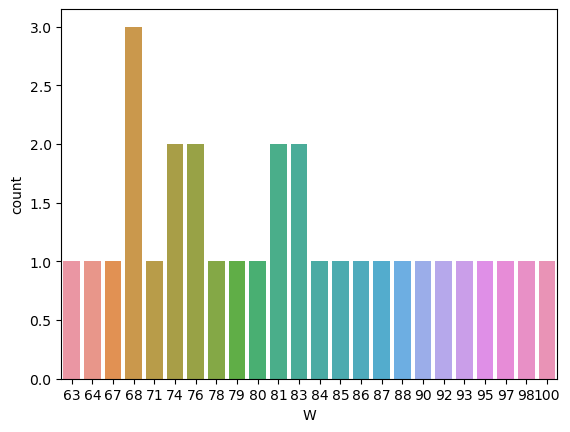

In [13]:
# Visualize the distribution of the target variable
sns.countplot(x='W', data=df)
plt.show()

In [14]:
#correlation between features and the target variable
correlation= df.corr()['W'].sort_values(ascending= False)

# Display the correlation values
print(correlation)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64


68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


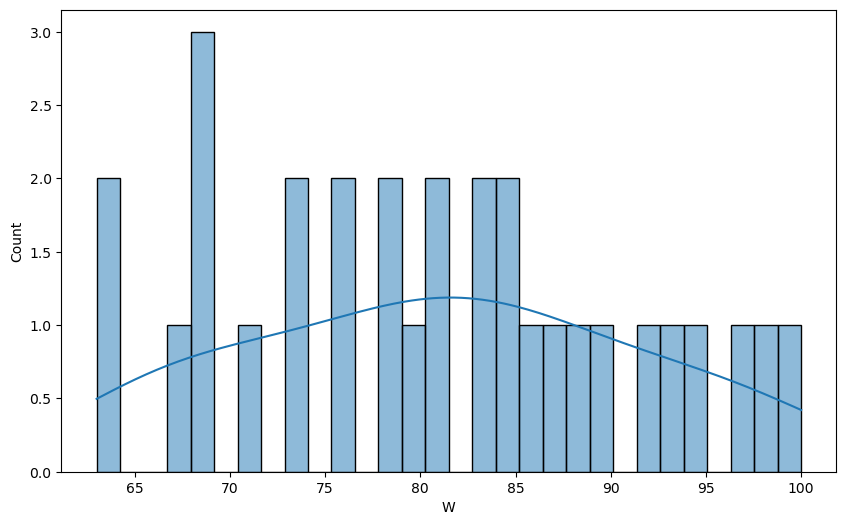

In [16]:
# Visualisation of distribution of the target variable (charges)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['W'], bins=30, kde=True)
print(df['W'].value_counts())
plt.show()

In [17]:
# Split the dataset into features (x) and target variable (y)
x = df.drop(['W'], axis=1)
y = df['W']

In [33]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Initialize RandomForestClassifier
    RFR = RandomForestClassifier()
    
    # Train the model
    RFR.fit(x_train, y_train)
    
    # Make predictions
    pred = RFR.predict(x_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, pred)
    
    # Update max accuracy and corresponding random state if the current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is", maxAccu, "at random_state", maxRS)


'''NOTE:predicting the number of wins in this baseball dataset, accuracy is not typically used as an evaluation metric. Accuracy is more commonly associated with classification problems, where the goal is to predict a categorical outcome.

For regression problems, metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are more appropriate for assessing the performance of the model. '''

Best accuracy is 0.1111111111111111 at random_state 16


'NOTE:predicting the number of wins in this baseball dataset, accuracy is not typically used as an evaluation metric. Accuracy is more commonly associated with classification problems, where the goal is to predict a categorical outcome.\n\nFor regression problems, metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are more appropriate for assessing the performance of the model. '

In [34]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= i)

In [43]:
#important necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge

In [36]:
# Initialize Linear Regression model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(x_train, y_train)

# Make predictions on the test set
pred_LR = LR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = LR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: -0.4712529705727091
R2_score on training data: 99.71706766246136
Mean Absolute Error: 9.77600418639554
Mean Squared Error: 218.72627495847607
Root Mean Squared Error: 14.789397383209232


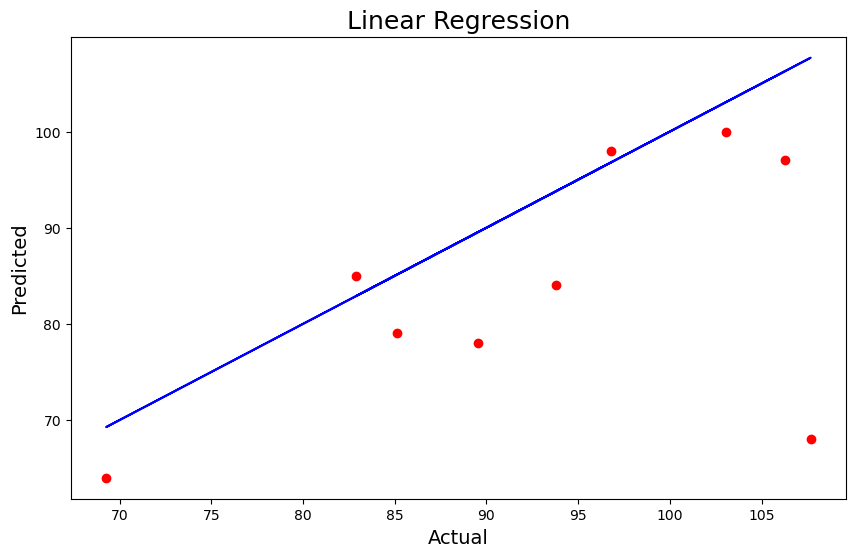

In [37]:
#scatter plot with the actual vs. predicted values for Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [41]:
RFR = RandomForestRegressor()

# Fit the model to the training data
RFR.fit(x_train, y_train)

# Make predictions on the test set
pred_RFR =RFR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = RFR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.44056606875934246
R2_score on training data: 91.06201962611699
Mean Absolute Error: 7.6311111111111085
Mean Squared Error: 83.16917777777775
Root Mean Squared Error: 9.11971368946294


In [44]:
knn = KNN()

# Fit the model to the training data
knn.fit(x_train, y_train)

# Make predictions on the test set
pred_knn =knn.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = knn.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.2149177877428996
R2_score on training data: 64.83383586426183
Mean Absolute Error: 9.044444444444444
Mean Squared Error: 116.71555555555558
Root Mean Squared Error: 10.80349737610722


In [45]:
GBR = GradientBoostingRegressor()

# Fit the model to the training data
GBR.fit(x_train, y_train)

# Make predictions on the test set
pred_GBR =GBR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = GBR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_GBR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.30018325312249794
R2_score on training data: 99.9999802654776
Mean Absolute Error: 8.950422657718358
Mean Squared Error: 104.03942303578863
Root Mean Squared Error: 10.199971717401407


In [46]:
lasso = Lasso()

# Fit the model to the training data
lasso.fit(x_train, y_train)

# Make predictions on the test set
pred_lasso =lasso.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = lasso.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: 0.505383242642105
R2_score on training data: 96.41433086188476
Mean Absolute Error: 6.876850097992109
Mean Squared Error: 73.53302459387372
Root Mean Squared Error: 8.575139916868629


In [47]:
rd = Ridge()

# Fit the model to the training data
rd.fit(x_train, y_train)

# Make predictions on the test set
pred_rd =rd.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = rd.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.48137687066881063
R2_score on training data: 97.9537121927231
Mean Absolute Error: 6.094569317644398
Mean Squared Error: 77.10197189390348
Root Mean Squared Error: 8.780772852881658


In [48]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the test set
pred_dtr =dtr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = dtr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_dtr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score: -0.02167414050822125
R2_score on training data: 100.0
Mean Absolute Error: 10.11111111111111
Mean Squared Error: 151.88888888888889
Root Mean Squared Error: 12.324321031557433


In [49]:
from sklearn.svm import SVR

svr=SVR()
# Fit the model to the training data
svr.fit(x_train, y_train)

# Make predictions on the test set
pred_svr =svr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = svr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_svr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score: -0.05020122390415449
R2_score on training data: -1.1807923911870244
Mean Absolute Error: 10.448612840622467
Mean Squared Error: 156.12991528708432
Root Mean Squared Error: 12.495195688226907


In [50]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
# Fit the model to the training data
etr.fit(x_train, y_train)

# Make predictions on the test set
pred_etr =etr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = etr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_etr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_etr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_etr)))

R2_score: 0.5899229446935723
R2_score on training data: 100.0
Mean Absolute Error: 7.092222222222223
Mean Squared Error: 60.96478888888891
Root Mean Squared Error: 7.807995190116917


In [51]:
from sklearn.model_selection import cross_val_score

In [ ]:
""" default scoring parameter in cross validation for classification models is - accuracy
default scoring parameter in cross validation for regression model is - r squared score  """

In [53]:
#cross_val_score on the Linear regression model (to insure overfitting or not )

score= cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_LR)- score.mean())*100)

[ 0.71136471 -2.21099237  0.38808753  0.73556937  0.5797478 ]
0.04075540667465847
Difference between R2 score and cross validation score is  -51.20083772473676


In [54]:
#cross_val_score on the RandomForestRegressor
score1= cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_RFR)- score1.mean())*100)

[ 0.22234591 -4.05230229  0.14587532  0.40144546  0.7283058 ]
-0.5108659579445561
Difference between R2 score and cross validation score is  95.14320267038985


In [55]:
#cross_val_score on the KNN

score2= cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_knn)- score2.mean())*100)

[-0.52888099 -3.77251908  0.16639756  0.08754788  0.51055621]
-0.7073796844198347
Difference between R2 score and cross validation score is  92.22974721627342


In [56]:
#cross_val_score on the GradientBoostingRegressor

score3= cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_GBR)- score3.mean())*100)

[-0.04807071 -6.98425023  0.23610386  0.4296188   0.54959923]
-1.1633998103946666
Difference between R2 score and cross validation score is  146.35830635171644


In [57]:
#cross_val_score on the lasso
score4= cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_lasso)- score4.mean())*100)

[ 0.5598312  -0.89631107  0.54411623  0.5306723   0.88070476]
0.32380268561253256
Difference between R2 score and cross validation score is  18.158055702957242


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.504e-01, tolerance: 3.040e-01
  model = cd_fast.enet_coordinate_descent(


In [58]:
#cross_val_score on the Ridge
score5= cross_val_score(rd,x,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_rd)- score5.mean())*100)

[ 0.67090465 -2.60020679  0.47831934  0.69410987  0.64922732]
-0.02152912211961755
Difference between R2 score and cross validation score is  50.29059927884282


In [59]:
#cross_val_score on the DecisionTreeRegressor
score6= cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_dtr)- score6.mean())*100)

[ -1.58703375 -11.19465649  -0.6199543    0.67032967   0.34852071]
-2.4765588318126293
Difference between R2 score and cross validation score is  245.48846913044082


In [60]:
#cross_val_score on the SVR
score7= cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_svr)- score7.mean())*100)

[-0.15989899 -0.7621832  -0.31850161 -0.75169003 -0.29872051]
-0.45819886720715275
Difference between R2 score and cross validation score is  40.79976433029982


In [61]:
#cross_val_score on the ExtraTreesRegressor
score8= cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_etr)- score8.mean())*100)

[-0.01821865 -4.35301679  0.35283945  0.34931159  0.74445414]
-0.5849260529550667
Difference between R2 score and cross validation score is  117.48489976486391


In [ ]:
"""lasso performs a search over the specified parameter values using cross-validation.
The best hyperparameters are printed, and the best model is obtained.
The model is evaluated on the test set using Mean Squared Error and R-squared."""

In [63]:
# Initialize the Lasso model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso()   #already defined above still writing to easy remember

# Define the hyperparameters and their possible values
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'max_iter': [1000, 2000, 3000]  # we can adjust the range based on your needs
}


# Create GridSearchCV
gscv_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
gscv_lasso.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.811e+00, tolerance: 1.267e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.644e-01, tolerance: 1.440e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+01, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e-01, tolerance: 1.146e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [1000, 2000, 3000]},
             scoring='neg_mean_squared_error')

In [64]:
# Print the best hyperparameters
best_params_lasso = gscv_lasso.best_params_
print("Best Hyperparameters for Lasso:", best_params_lasso)

Best Hyperparameters for Lasso: {'alpha': 10.0, 'max_iter': 1000}


In [66]:
# Get the best Lasso model from the grid search
best_lasso_model = gscv_lasso.best_estimator_

# Make predictions on the test set
y_pred_lasso = best_lasso_model.predict(x_test)

# Evaluate the Lasso model on the test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics for Lasso
print("Mean Squared Error (Lasso) on Test Set:", mse_lasso)
print("R-squared (Lasso) on Test Set:", r2_lasso)

Mean Squared Error (Lasso) on Test Set: 64.49014832082842
R-squared (Lasso) on Test Set: 0.5662097646581048


In [68]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with specified hyperparameters
lasso_model = Lasso(alpha=1.0, max_iter=1000, random_state=1)

# 'alpha' is the regularization strength, controlling the amount of shrinkage. It's analogous to the 'learning_rate' in GradientBoostingRegressor.
# 'max_iter' is the maximum number of iterations for the solver to converge.
# 'random_state' is the seed used by the random number generator.



In [69]:
# Fit the Lasso model to the training data
lasso_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(x_test)

# Evaluate the Lasso model on the test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics for Lasso
print("Mean Squared Error (Lasso) on Test Set:", mse_lasso)
print("R-squared (Lasso) on Test Set:", r2_lasso)


Mean Squared Error (Lasso) on Test Set: 73.53302459387372
R-squared (Lasso) on Test Set: 0.505383242642105


In [ ]:
# Now Saving the model , after checking the performance of the final model

In [75]:
import pickle
filename='Baseball_winning.pkl'
pickle.dump(lasso_model,open(filename,'wb'))  #saved model

In [ ]:
#After saving the model if we want to use the same model in future , we can load the model by using the 'open'method

In [76]:
import pickle
loaded_model=pickle.load(open('Baseball_winning.pkl','rb')) # rb= read binary
result=loaded_model.score(x_test,y_test)
print(result*100)

50.5383242642105


In [77]:
#Now if we want to see what the difference between our predicted and original value

conclusion= pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,92.487755,81.305644,86.374444,85.323124,98.672355,88.1095,72.307666,89.594116,94.351446
Original,97.000000,85.000000,79.000000,78.000000,100.000000,68.0000,64.000000,84.000000,98.000000


In [79]:
##JUST checking dont know if its needed 
# Make predictions on the test set
y_pred = lasso_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 73.53302459387372
